In [3]:
"""
Correlation and regression

You are given the data above.  

x(age): 30, 40, 40, 20, 12, 31, 10
y(body size): 160, 160, 170, 50, 110, 160, 100

Using Python, perform the following:

Calculate Pearson correlation
Draw the regression line
Calculate optimal values of the weights b0 and b1
Calculate coefficient of determination. 
    -> calculate RSS
        -> Calculate R2 = 1 - ((RSS)/TSS) 
Additionally, provide a new linear regression equation. 

Do not use any additional libraries, except pandas. 
"""

'\nCorrelation and regression\n\nYou are given the data above.  \n\nx(age): 30, 40, 40, 20, 12, 31, 10\ny(body size): 160, 160, 170, 50, 110, 160, 100\n\nUsing Python, perform the following:\n\nCalculate Pearson correlation\nDraw the regression line\nCalculate optimal values of the weights b0 and b1\nCalculate coefficient of determination. \n    -> calculate RSS\n        -> Calculate R2 = 1 - ((RSS)/TSS) \nAdditionally, provide a new linear regression equation. \n\nDo not use any additional libraries, except pandas. \n'

In [4]:
import pandas as pd
age = [30, 40, 40, 20, 12, 31, 10]
body_size = [160, 160, 170, 50, 110, 160, 100]

df = pd.DataFrame({"age": age, "body size": body_size})

In [5]:
# pearson_corr_coeff = cov(x, y)/(sigma(x)*sigma(y)) 
# cov (x, y) = sum((x-mean(x))*(y-mean(y)))
# sigma(x) = sqrt(sum((x-mean(x)**2)))*sqrt(sum((y-mean(y)**2)))

In [6]:
df["age"].corr(df["body size"], method="pearson")

np.float64(0.749053078925714)

In [7]:
# score of 0.74 was observed -> positive correlation

In [8]:
# Draw the regression line

In [9]:
x = df["age"]
y = df["body size"]

# b1 is cov(x, y)/var(x)
# b2 is y - b1*x_mean

b1 = ( (x - x.mean()) * (y - y.mean()) ).sum() / ((x - x.mean())**2).sum()
print(b1)
b0 = y.mean() - b1 * x.mean()

# Predicting values
y_pred = b0 + b1 * x

# Calculating R-squared (coefficient of determination)
# r-squared = 1 - ((residual(y, y_pred)/(residual(y, y_mean)))
# residual(x, y) = sum((x-y)**2)
ss_total = ((y - y.mean())**2).sum()
ss_residual = ((y - y_pred)**2).sum()
r_squared = 1 - (ss_residual / ss_total)

# New linear regression equation
equation = f"y = {b0:.2f} + {b1:.2f}x"

# print(f"Pearson Correlation: {correlation:.4f}")
print(f"Regression Equation: {equation}")
print(f"Coefficient of Determination (R^2): {r_squared:.4f}")


2.7040024821594786
Regression Equation: y = 59.31 + 2.70x
Coefficient of Determination (R^2): 0.5611


In [10]:
cov_x_y = df["age"].cov(df["body size"])
print(cov_x_y)
var_x = df["age"].var()

b1 = (cov_x_y/var_x)
print(cov_x_y/var_x)

b0 = df["body size"].mean() - (b1*df["age"].mean())

print(b0)

df["predicted body size"] = b0 + b1*df["age"]




# y = b0 + b1*x

# b0 = y-b1*x_mean



415.0
2.704002482159479
59.30964939497362


In [11]:
df

,age,body size,predicted body size
0,30,160,140.429724
1,40,160,167.469749
2,40,170,167.469749
3,20,50,113.389699
4,12,110,91.757679
5,31,160,143.133726
6,10,100,86.349674


In [ ]:
# coefficient of determination

RSS = sum((df["body size"]-df["predicted body size"])**2)
TSS = sum((df["body size"]-df["body size"].mean())**2)
r2 = 1 - (RSS/TSS)
print(r2)


# If R² is 0.56, it means that 56% of the variance in the dependent variable is explained by the model, and the remaining 44% is unexplained or due to other factors not captured by the model.

0.5610805150480918


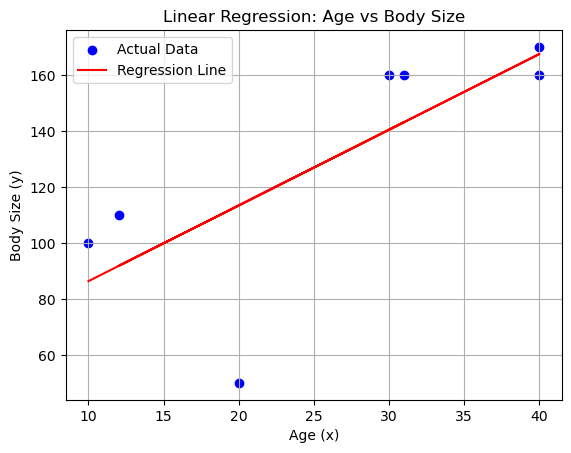

In [55]:
import matplotlib.pyplot as plt

plt.scatter(df['age'], df['body size'], color='blue', label='Actual Data')

# Plot the regression line
plt.plot(df["age"], df["predicted body size"], color='red', linestyle='-', label='Regression Line')

# Labels and title
plt.xlabel("Age (x)")
plt.ylabel("Body Size (y)")
plt.title("Linear Regression: Age vs Body Size")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
""" 
We square the differences in RSS (Residual Sum of Squares) and TSS (Total Sum of Squares) for several important reasons:

1. Avoiding Negative Differences (Cancellation of Errors):
If we simply use the difference between the actual value and the predicted value (or the mean value for TSS), some differences would be positive and others negative. If we sum them directly, they could cancel each other out, leading to a misleading result. For example:

If the predicted value is slightly above the actual value in some cases and slightly below in others, the sum of the differences might be close to zero, even if the model isn't performing well.
Squaring the differences ensures that both overestimates and underestimates contribute positively to the total error, making sure they don’t cancel each other out.
2. Emphasizing Larger Errors:
Squaring the differences has the effect of giving more weight to larger errors. The larger the residual (the difference between the actual and predicted value), the more it impacts the total error. This is important because:

Large errors are typically more undesirable and squaring them penalizes the model more for making large mistakes.
Without squaring, all errors would be treated equally regardless of size, which wouldn’t reflect the actual performance of the model accurately.
For example, if you had an error of 10 in one instance and an error of 1 in another, the square of 10 is 100, while the square of 1 is just 1. This shows that the larger error should have a disproportionate effect on the final sum.

3. Mathematical Convenience and Relationship with Variance:
Squaring the differences aligns with the concept of variance, which is also the average of squared deviations from the mean. In statistical analysis, variance is a key measure of how spread out the data is, and squaring the differences allows RSS and TSS to be directly related to the variance.

In the case of TSS, we are measuring how spread out the data is around the mean.
In RSS, we are measuring how far off the predictions are from the true values.
By squaring, we're aligning the error measurements with the underlying statistical properties of variance and standard deviation.

4. Differentiability and Optimization:
Squaring the differences also makes the function differentiable and easier to optimize, particularly when fitting models like linear regression. When fitting a model, we typically use gradient-based methods to minimize the error. Squaring the differences ensures that the error function is smooth and continuously differentiable, making it easier to apply optimization algorithms like gradient descent.
"""